In [1]:
import OSGridConverter

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from peak_prominence2d import getProminence

In [5]:
import numpy.ma as ma

In [6]:
import pandas as pd

In [7]:
from geotiff import GeoTiff
from glob import glob

tiff_files = glob("data/*DTM_PHASE5.tif")

geo_tiff = GeoTiff("data/NS66SE_50CM_DTM_PHASE5.tif")

In [8]:

tiff_data = geo_tiff.read()
heights = np.array(tiff_data)
land = ma.masked_less(heights, 0)
land_small = land[::100,::100]
    

In [9]:
peaks = getProminence(land_small, step=1, min_depth=5, verbose=False)

[Text(0, -2000.0, ''),
 Text(0, 0.0, ''),
 Text(0, 2000.0, ''),
 Text(0, 4000.0, ''),
 Text(0, 6000.0, ''),
 Text(0, 8000.0, ''),
 Text(0, 10000.0, '')]

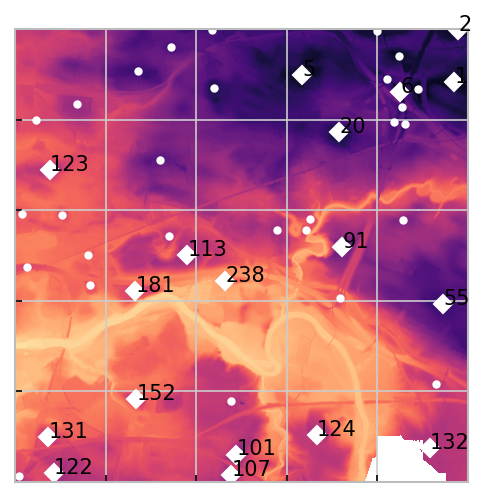

In [10]:
f, ax = plt.subplots(1,1, dpi=150)
ax.imshow(land, vmin=0, origin='upper')
for peak in [p for p in peaks[0].values() if p['height']>30 and p['prominence']>=10]:
    #print(peak['height'])
    summit = np.array([[100*peak['center'][0], 100*peak['center'][1]]])
    #ax.plot(100*peak['center'][0], 100*peak['center'][1], 'wD')
    ax.plot(summit[:,0], summit[:,1], 'wD')
    ax.text(summit[:,0]+10, summit[:,1]+10, s=peak['id'])
for peak in [p for p in peaks[0].values() if p['height']>30 and (p['prominence']<10 and p['prominence']>=5)]:
    parent = np.array([[100*peaks[0][peak['parent']]['center'][0], 100*peaks[0][peak['parent']]['center'][1]]])
    top = np.array([[100*peak['center'][0], 100*peak['center'][1]]])
    ax.plot(top[:,0], top[:,1], 'w.')
    #ax.arrow(x=top[0,0], y=top[0,1], dx=parent[0,0] - top[0,0], dy=parent[0,1] - top[0,1])
ax.set_xticklabels([])
ax.set_yticklabels([])

In [11]:
summits =  [p for p in peaks[0].values() if p['height']>30 and p['prominence']>=10]
tops =  [p for p in peaks[0].values() if p['height']>30 and (p['prominence']<10 and p['prominence']>=5)]

In [12]:
hill_list = pd.DataFrame(columns=["name", "height", "prominence", "latitude", "longitude", "gridref"])
top_list = pd.DataFrame(columns=["name", "height", "prominence", "latitude", "longitude", "gridref"])

In [13]:
for summit in summits:
    lon, lat = geo_tiff.get_wgs_84_coords(int(np.round(100*summit['center'][0])), int(np.round(100*summit['center'][1])))
    
    hill_list.loc[len(hill_list.index)] = {"name": summit['id'], "height": int(summit['height']), "prominence": summit['prominence'], 'latitude': lat, 'longitude': lon, 'gridref': str(OSGridConverter.latlong2grid(lat, lon, tag = 'WGS84'))}

In [14]:
for summit in tops:
    lon, lat = geo_tiff.get_wgs_84_coords(int(np.round(100*summit['center'][0])), int(np.round(100*summit['center'][1])))
    
    top_list.loc[len(top_list.index)] = {"name": summit['id'], "height": int(summit['height']), "prominence": summit['prominence'], 'latitude': lat, 'longitude': lon, 'gridref': str(OSGridConverter.latlong2grid(lat, lon, tag = 'WGS84'))}

In [15]:
hill_list

,name,height,prominence,latitude,longitude,gridref
0,1,86,86.257,55.855284,-4.080739,NS 69849 64412
1,2,85,12.000,55.860466,-4.080425,NS 69886 64988
2,5,82,11.000,55.855532,-4.107635,NS 68167 64491
3,6,82,10.000,55.854162,-4.090233,NS 69251 64305
4,20,78,10.000,55.850023,-4.100810,NS 68575 63865
5,55,70,34.000,55.833238,-4.081621,NS 69720 61961
6,91,60,19.000,55.838594,-4.099579,NS 68614 62591
7,101,56,56.257,55.817735,-4.117131,NS 67444 60303
8,107,54,11.000,55.815662,-4.117976,NS 67384 60074
9,113,50,14.000,55.837397,-4.126856,NS 66902 62510


In [16]:
top_list

,name,height,prominence,latitude,longitude,gridref
0,3,84,9.0,55.854456,-4.087173,NS 69444 64332
1,4,82,7.0,55.857706,-4.090591,NS 69241 64700
2,10,80,9.0,55.860163,-4.094614,NS 68997 64981
3,19,78,7.0,55.855436,-4.092706,NS 69101 64452
4,22,77,7.0,55.853949,-4.123119,NS 67192 64344
5,34,75,9.0,55.851041,-4.089283,NS 69300 63956
6,39,73,5.0,55.859763,-4.123700,NS 67176 64992
7,41,73,5.0,55.852653,-4.089904,NS 69267 64137
8,52,70,8.0,55.855403,-4.136468,NS 66362 64532
9,54,70,5.0,55.851176,-4.091143,NS 69184 63975
